In [1]:
from tree_detection_framework.preprocessing.preprocessing import (
    create_dataloader,
    create_intersection_dataloader,
)
from tree_detection_framework.detection.detector import (
    GeometricTreeCrownDetector,
)
import geopandas as gpd

/ofo-share/repos-david/conda/envs/TDF-SAM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/ofo-share/repos-david/conda/envs/TDF-SAM/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.2'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
RASTER_FOLDER_PATH = "/ofo-share/repos-david/tree-detection-framework/data/tree_crown_tests/chm.tif"
TREETOP_DETECTIONS = "/ofo-share/repos-david/tree-detection-framework/data/tree_crown_tests/tree_tops.geojson"
# If the size is increased to 1750 the vector/raster pairing will fail
# At 1900 the raster-only will fail
CHIP_SIZE = 1700
CHIP_STRIDE = 750
RESOLUTION = 0.2

In [3]:
raster_dataloader = create_dataloader(raster_folder_path=RASTER_FOLDER_PATH,
    chip_size=CHIP_SIZE,
    chip_stride=CHIP_STRIDE,
    resolution=RESOLUTION)
# Show the number of tiles
print(f"Number of tiles for raster only {len(raster_dataloader)}")

INFO:root:Units = Units.PIXELS
INFO:root:Stride = 750


Number of tiles for raster only 4


<Axes: >

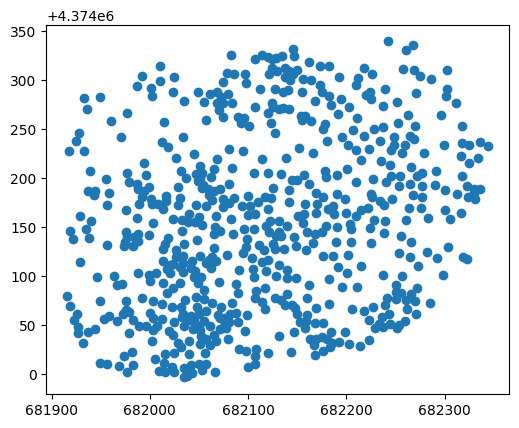

In [4]:
tree_tops = gpd.read_file(TREETOP_DETECTIONS)
tree_tops.plot()

In [5]:
raster_vector_dataloader = create_intersection_dataloader(
    raster_data=RASTER_FOLDER_PATH,
    vector_data=TREETOP_DETECTIONS,
    chip_size=CHIP_SIZE,
    chip_stride=CHIP_STRIDE,
    resolution=RESOLUTION,
)
# Show the number of tiles
print(f"Number of tiles for raster-vector intersection {len(raster_vector_dataloader)}")

INFO:root:Stride = 750
INFO:root:Units = Units.PIXELS


Number of tiles for raster-vector intersection 4


In [6]:
treecrown_detector = GeometricTreeCrownDetector()

treecrown_detections = treecrown_detector.predict(raster_vector_dataloader)

Performing prediction on batches: 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]


In [7]:
# Display outputs from the tree crown detector. Note: treetop UIDs get maintained.
treecrown_detections.get_data_frame(merge=True)

,score,height,treetop_unique_ID,geometry,region_ID,unique_ID
0,3352.614732,31.085508,00000,"POLYGON ((681999.91 4374084.693, 682001.686 43...",0,00000
1,722.291386,5.240727,00001,"POLYGON ((681969.94 4374089.522, 681970.204 43...",0,00001
2,840.704827,6.431295,00002,"POLYGON ((681968.363 4374094.502, 681968.007 4...",0,00002
3,3585.808067,14.386769,00004,"POLYGON ((681984.511 4374074.033, 681984.874 4...",0,00003
4,1535.059630,54.151024,00005,"POLYGON ((682008.686 4374076.23, 682008.686 43...",0,00004
...,...,...,...,...,...,...
1335,408.442189,5.481540,00605,"POLYGON ((682263.634 4374331.291, 682263.525 4...",3,01335
1336,4361.495282,46.568745,00606,"POLYGON ((682212.752 4374307.937, 682213.286 4...",3,01336
1337,1280.453910,9.637932,00607,"POLYGON ((682262.82 4374313.015, 682262.629 43...",3,01337
1338,710.021564,5.015514,00610,"POLYGON ((682228.638 4374306.924, 682228.566 4...",3,01338


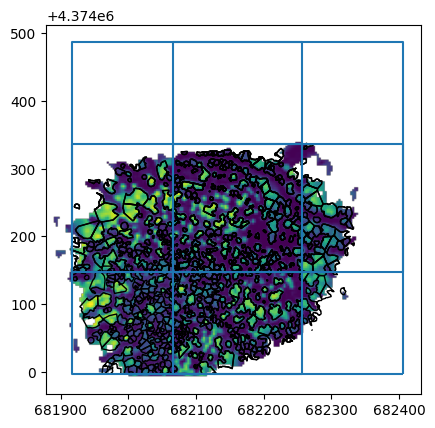

<Axes: >

In [8]:
treecrown_detections.plot(
    raster_file=RASTER_FOLDER_PATH
)